# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [ ]:
!rm -rf traffic-signs-data.zip> /dev/null
!wget https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip

In [ ]:
! rm -rf /tmp/*.p> /dev/null
! unzip traffic-signs-data.zip -d /tmp

In [1]:
# required imports
import pickle
import numpy as np
import cv2

---
## Step 0: Load The Data

In [2]:
# TODO: Fill this in based on where you saved the training and testing data
# Load pickled data
training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [5]:
def visualize_images(images, grayscale=False):
    fig, axs = plt.subplots(nrows=7, ncols=7, figsize=(10, 10),subplot_kw={'xticks': [], 'yticks': []})

    for ax, class_indx in zip(axs.flat, range(0,43)):
        selected_img = images[y_train ==class_indx]
        if grayscale:
            ax.imshow(selected_img[0,:,:,:], cmap='gray')
        else:
            ax.imshow(selected_img[0,:,:,:])
        ax.set_title(str(class_indx))
        
    # Delete blank subplot
    for i in range(1,7):
        fig.delaxes(axs[6][i])

    plt.tight_layout()
    plt.show()

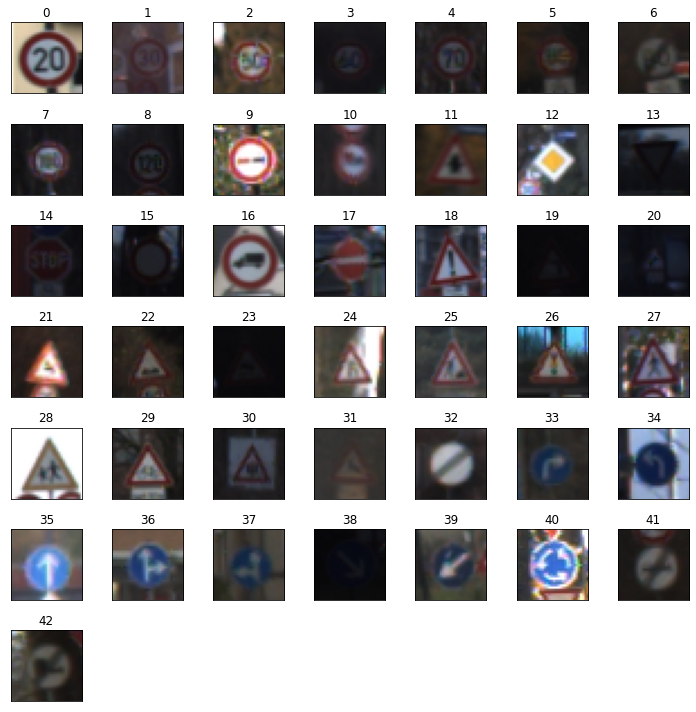

In [6]:
visualize_images(X_train)

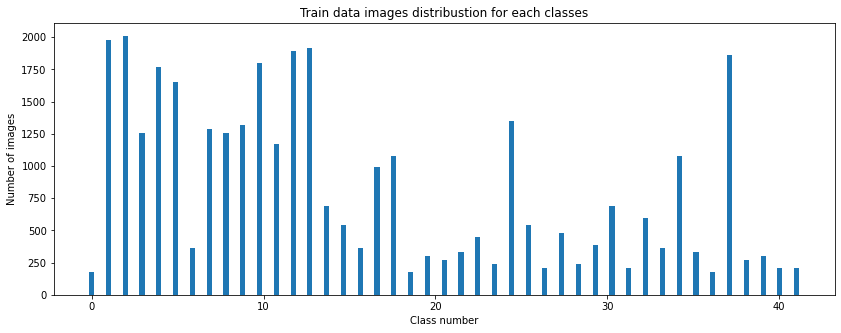

Min number of image per class:  180
Max number of image per class:  2010


In [7]:
# histogram of label frequency
counts, bins = np.histogram(y_train, bins=n_classes)
plt.figure(figsize=(14,5))
plt.bar(bins[:-1], counts, width=0.3)
plt.title("Train data images distribustion for each classes")
plt.ylabel("Number of images")
plt.xlabel("Class number")
plt.show()

print("Min number of image per class: ", min(counts))
print("Max number of image per class: ", max(counts))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### Grayscale images

In [8]:
# Graysscale the images - train set
X_train_rgb = np.copy(X_train)
X_train_gray = np.sum(X_train / 3, axis=3, keepdims=True)

# Graysscale the images - test set
X_test_rgb = np.copy(X_test)
X_test_gray = np.sum(X_test / 3, axis=3, keepdims=True)

# Graysscale the images - valid set
X_valid_rgb = np.copy(X_valid)
X_valid_gray = np.sum(X_valid / 3, axis=3, keepdims=True)

print("RGB shape of an image: ", X_train_rgb[0].shape)
print("Grayscale shape of an image: ", X_train_gray[0].shape)

RGB shape of an image:  (32, 32, 3)
Grayscale shape of an image:  (32, 32, 1)


#### Visualize grayscaled images

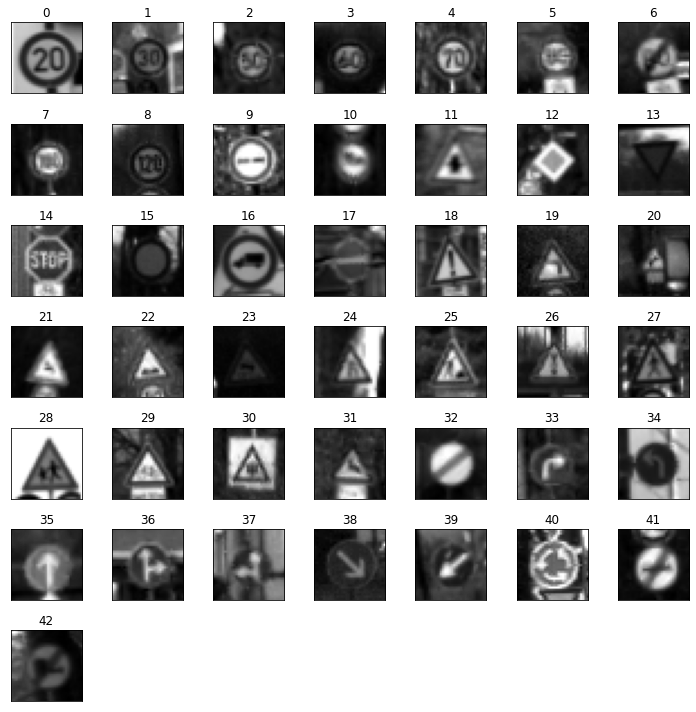

In [9]:
visualize_images(X_train_gray, True)

In [10]:
# Reassign train,test, and valid values
X_train = X_train_gray
X_test = X_test_gray
X_valid = X_valid_gray

#### Normalize grayscaled images

In [11]:
# Normalize train values
X_train_normalize = (X_train - 128) / 128
# Normalize test values
X_test_normalize = (X_test - 128) / 128
# Normalize valid values
X_valid_normalize = (X_valid - 128) / 128

#### Visualize normalized images

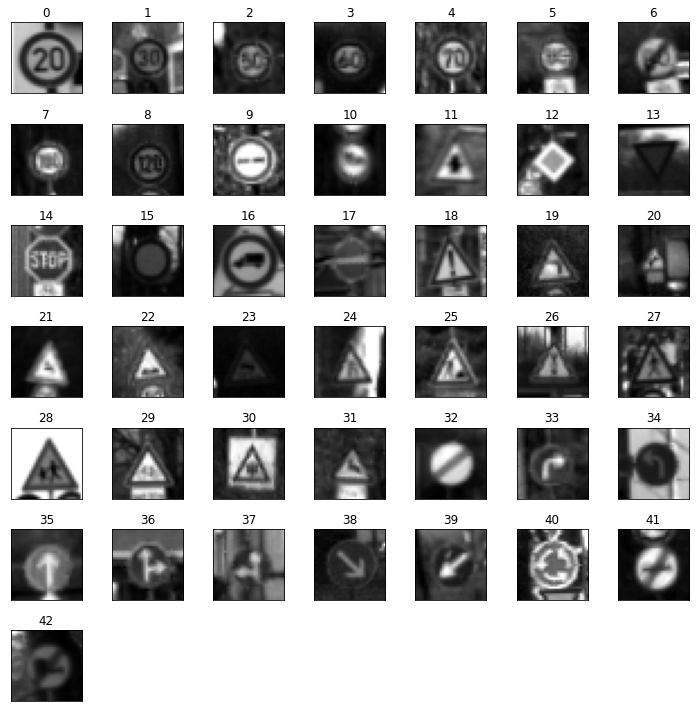

Grayscale shape of an image:  (32, 32, 1)
Nomalized shape of an image:  (32, 32, 1)


In [12]:
# Visualize normalized images
visualize_images(X_train_normalize, True)
print("Grayscale shape of an image: ", X_train[0].shape)
print("Nomalized shape of an image: ", X_train_normalize[0].shape)

In [13]:
# Reassign train, test, and valid values
X_train = X_train_normalize
X_test = X_test_normalize
X_valid = X_valid_normalize

##### Discussions 01: The submission describes the preprocessing techniques used and why these techniques were chosen.
* Grayscaled RGB images to reduce three color channels to one channel. This will reduce CNN training time and it'll help to identify images' shapes(lines, curves, other polygins) crearly.
* Normalized image data into range [-1, 1]. If we didn't scale our input training vectors, the ranges of our distributions of feature values would likely be different for each feature, and thus the learning rate would cause corrections in each dimension that would differ (proportionally speaking) from one another. We might be over compensating a correction in one weight dimension while undercompensating in another. 

#### Image Data Augmentation
Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset. Following image processing techniques will be used to augmentations for images. Following common augmentation techinues will be used to do image data augmentation.

In [14]:
def random_translate(img):
    """
    This is used to apply linear transfomation followed by vector addition(translation). Also this technique
    is called as Affine transform.
    https://docs.opencv.org/4.4.0/d4/d61/tutorial_warp_affine.html
    
    :param img - grayscale and normalized image
    """
    h,w = img.shape[:2]
    
    # allow translation up to px pixels in x and y directions
    px = 2
    dx,dy = np.random.randint(-px,px,2)

    M = np.float32([[1,0,dx],[0,1,dy]])
    dst = cv2.warpAffine(img,M,(w,h))
    
    return dst[:,:,np.newaxis]

def random_scaling(img):   
    """
    This is used to gerate new scaled images.
    
    :param img - grayscale and normalized image
    
    """
    h,w = img.shape[:2]

    # transform limits
    px = np.random.randint(-2,2)

    # ending locations
    pts1 = np.float32([[px,px],[h-px,px],[px,w-px],[h-px,w-px]])

    # starting locations (4 corners)
    pts2 = np.float32([[0,0],[h,0],[0,w],[h,w]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(img,M,(h,w))
    
    return dst[:,:,np.newaxis]

def random_warp(img):
    """
    This is ued to do warp images and affine transformation technique is used to generate image mstrix.
    
    :param img - grayscale and normalized image
    """
    h,w = img.shape[:2]

    # random scaling coefficients
    dx = np.random.rand(3) - 0.5
    dx *= w * 0.06   # this coefficient determines the degree of warping
    dy = np.random.rand(3) - 0.5
    dy *= h * 0.06

    # 3 starting points for transform, 1/4 way from edges
    x1 = w/4
    x2 = 3*w/4
    y1 = h/4
    y2 = 3*h/4

    pts1 = np.float32([[y1,x1],
                       [y2,x1],
                       [y1,x2]])
    pts2 = np.float32([[y1+dy[0],x1+dx[0]],
                       [y2+dy[1],x1+dx[1]],
                       [y1+dy[2],x2+dx[2]]])

    M = cv2.getAffineTransform(pts1,pts2)

    dst = cv2.warpAffine(img,M,(w,h))
    
    return dst[:,:,np.newaxis]

def random_brightness(img):
    """
    This is used to change brightness randomly.
    
    :param img - grayscale and normalized image
    """
    shifted = img + 1.0   # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    dst = shifted * coef - 1.0
    
    return dst

def generate_aug_image(img):
    """
    
    """
    return random_translate(random_scaling(random_warp(random_brightness(img))))

In [15]:
def visualize_aug_image(img, aug_img, label):
    """
    This is an utility function to visualize augmented images.
    """
    fig, axs = plt.subplots(1,2, figsize=(10, 3))

    axs[0].axis('off')
    axs[0].imshow(img.squeeze(), cmap='gray')
    axs[0].set_title('Original')

    axs[1].axis('off')
    axs[1].imshow(img_dst.squeeze(), cmap='gray')
    axs[1].set_title(label)

Shape original image: (32, 32, 1)
Shape affine tranformed image: (32, 32, 1)


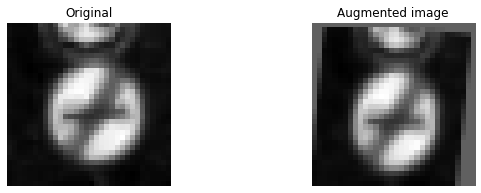

In [16]:
img = X_train[0]
img_dst = generate_aug_image(img)
visualize_aug_image(img,img_dst,'Augmented image')

print('Shape original image: (%i, %i, %i)'% img.shape)
print('Shape affine tranformed image: (%i, %i, %i)'% img_dst.shape)

In [17]:
print("Train set X shape: ", X_train.shape)
print("Train set Y shape: ", y_train.shape)

Train set X shape:  (34799, 32, 32, 1)
Train set Y shape:  (34799,)


___

In [18]:
# from tqdm import tqdm
# #Genearate augmented images
# for c_idx in tqdm(range(n_classes)):
#     selected_img = X_train[y_train ==c_idx]
    
#     if len(selected_img)  <= 800:
#         n = 800-len(selected_img)
#         new_img = selected_img[0,:,:,:]
        
#         for i in tqdm(range(n)):
#             # create a new image
#             aug_img = generate_aug_image(new_img)

#             X_train = np.concatenate((X_train, [aug_img]), axis=0)
#             y_train = np.concatenate((y_train, [c_idx]), axis =0)


In [19]:
# Cast to float array, this is the dataset that is used by TF
# X_train, X_test, X_valid = np.array(X_train, np.float32), np.array(X_test, np.float32), np.array(X_valid, np.float32)

In [20]:
# Save generated values for futute training
# db = {
#     "train_x": X_train,
#     "train_y": y_train,
#     "test_x": X_test,
#     "test_y": y_test,
#     "valid_x": X_valid,
#     "valid_y": y_valid
# }

# with open("db.p", 'wb') as p:
#     pickle.dump(db, p, protocol=pickle.HIGHEST_PROTOCOL)

---

In [21]:
# Load dataset from pickle file
with open('./db.p', mode='rb') as f:
    dataset = pickle.load(f)

X_train, y_train = dataset['train_x'], dataset['train_y']
X_test, y_test = dataset['test_x'], dataset['test_y']
X_valid, y_valid = dataset['valid_x'], dataset['valid_y']


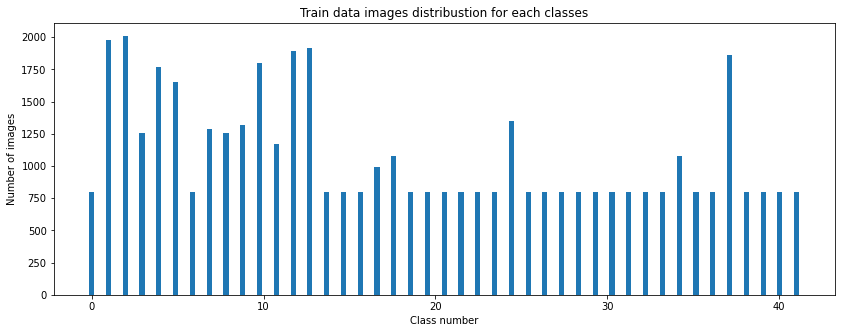

Min number of image per class:  800
Max number of image per class:  2010
Train set X shape:  (46480, 32, 32, 1)
Train set Y shape:  (46480,)


In [22]:
counts, bins = np.histogram(y_train, bins=n_classes)
plt.figure(figsize=(14,5))
plt.bar(bins[:-1], counts, width=0.3)
plt.title("Train data images distribustion for each classes")
plt.ylabel("Number of images")
plt.xlabel("Class number")
plt.show()

print("Min number of image per class: ", min(counts))
print("Max number of image per class: ", max(counts))

print("Train set X shape: ", X_train.shape)
print("Train set Y shape: ", y_train.shape)

In [23]:
#Shuffle the training dataset
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [24]:
#Split validation dataset off from training dataset
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [25]:
print("New training data shape - X_train: ", X_train.shape)
print("New training data shape - y_train: ", y_train.shape)
print("New training data shape - X_validation: ", X_validation.shape)
print("New training data shape - y_validation: ", y_validation.shape)

New training data shape - X_train:  (37184, 32, 32, 1)
New training data shape - y_train:  (37184,)
New training data shape - X_validation:  (9296, 32, 32, 1)
New training data shape - y_validation:  (9296,)


##### Discussion 02:  Data augmentation,  traning data spliting for training and validation
* Data augmentation is increased accurcy of the model, because several classes in the data have far fewer samples than others the model will tend to be biased toward those classes with more samples. I generated augmented images for classes that's frequencies less than or equal to 900.

## Model Architecture

In [26]:
# Tensorflow dependencies
import tensorflow as tf
from tensorflow.keras import layers

In [27]:
# Last training parameters.
# Traffic_Sign_Classifier.py can be used to 
flatten = layers.Flatten()
dropout = layers.Dropout(rate=0.53)
mu = 0.0
sigma = 0.1
l_rate = 0.002

In [28]:
# Create a some wrapper
def conv2d(x, W, b, stride=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)

    return tf.nn.relu(x)

In [29]:
def maxpoll2d(x, k=2):
    # Maxpool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='VALID')

In [30]:
random_normal = tf.initializers.RandomNormal(mean=mu, stddev=sigma)
weights = {
    # Conv layer 1: 5x5 conv, 1 input, 32 filters
    'wc1': tf.Variable(random_normal([5, 5, 1, 6])),
    # Conv layer 2: 5x5 conv, 32 inouts, 64 filters
    'wc2': tf.Variable(random_normal([5, 5, 6, 16])),
    # Fully connected layer: 7x7x64 inputs, 1024 units
    'wd1': tf.Variable(random_normal([5, 5, 16, 400])),
    # FC output layer: 1024 inputs, 43 units
    'out': tf.Variable(random_normal([800, 43]))
}

biases = {
    'bc1': tf.Variable(tf.zeros(6)),
    'bc2': tf.Variable(tf.zeros(16)),
    'bd1': tf.Variable(tf.zeros(400)),
    'out': tf.Variable(tf.zeros(43))
}

In [31]:
# CNN Architecture
def conv_net(x):
    # Convolution layer. Output shape: [-1, 32, 32, 32]
    x = tf.reshape(x, [-1, 32, 32, 1])

    # new_size = (input_size - filter_size + 2 x padding_size )/ stride +1
    # (32 - 5 + 2 * 0)/1 +1 = 27  +1 = 28
    # 5 x 5 fiter 6
    # new shape = 28 x 28 x 6
    # Convolution layer, input shape:[-1,32,32,1]. Output shape: [-1, 28, 28, 6]
    x = conv2d(x, weights['wc1'], biases['bc1'])
    # Max pooling(down sampling), input shape[-1,28,28,6]. output shape [-1, 14,14,6]
    x = maxpoll2d(x, k=2)
    
    # Convolution layer, input shape: [-1,14,14,6]. Output shape: [-1, 10,10, 16]
    x = conv2d(x, weights['wc2'], biases['bc2'])

    # Max pooling(down sampling), input shape[-1,10,10,16]. output shape [-1, 5,5,16]
    x = maxpoll2d(x, k=2)
    layer2 = x

    # Convolution layer. Output shape: [-1, 1, 1, 400]
    x = conv2d(x, weights['wd1'], biases['bd1'])

    # Flatten layer
    l2_flat = flatten(layer2)
    x_flat = flatten(x)
    # Concatanate flattened layers to single size 800 layer
    res = tf.concat(values=[l2_flat, x_flat], axis=1)
    
    # Apply dropout
    x = dropout(res, training=True)

    # Fully connected layer, output shape [-1, 43]
    out = tf.add(tf.matmul(x, weights['out']), biases['out'])

    # Apply softmax to normalize the logists to a probability distribution
    return tf.nn.softmax(out)


In [32]:
# Cross-entropy
def cross_entropy(y_pred, y_true):
    # Encode labels to a one hot vector
    y_true = tf.one_hot(y_true, depth=n_classes)

    # Clip prediction values to avoid log(0) error
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)

    # Compute cross-entropy
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))



In [33]:
# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

In [34]:
# Optimization process
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automate differentiation

    with tf.GradientTape() as g:
        pred = conv_net(x)
        loss = cross_entropy(pred, y)

    # Variables to update, i.e trainable vars
    trainable_vars = list(weights.values()) + list(biases.values())

    # Compute gradients
    gradients = g.gradient(loss, trainable_vars)

    # Update W and b following gradient
    optimizer.apply_gradients(zip(gradients, trainable_vars))

In [35]:
# sklearn dependencies
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# Shuffle dataset
X_train, y_train = shuffle(X_train, y_train)
# Split training dataset
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [36]:
epoches = 65
batch_size = 130
display_steps = 100
optimizer = tf.optimizers.Adam(l_rate)
n = len(X_train)
step = 0

In [37]:
# Train the CNN model
for i in range(epoches):
    X_train, y_train = shuffle(X_train, y_train)
    for offset in range(0, n, batch_size):
        step += 1
        end = offset + batch_size
        batch_x, batch_y = X_train[offset:end], y_train[offset:end]
        run_optimization(batch_x, batch_y)
    print("EPOCH: ", i+1)
    pred = conv_net(X_validation)
    loss = cross_entropy(pred, y_validation)
    acc = accuracy(pred, y_validation)  
    print("STEP: %i, LOSS: %f, ACCURACY: %f" % (step, loss, acc))

EPOCH:  1
STEP: 229, LOSS: 3618.700195, ACCURACY: 0.862445
EPOCH:  2
STEP: 458, LOSS: 2000.783936, ACCURACY: 0.923491
EPOCH:  3
STEP: 687, LOSS: 1364.824219, ACCURACY: 0.948232
EPOCH:  4
STEP: 916, LOSS: 943.135620, ACCURACY: 0.963157
EPOCH:  5
STEP: 1145, LOSS: 981.173096, ACCURACY: 0.961275
EPOCH:  6
STEP: 1374, LOSS: 888.673096, ACCURACY: 0.966922
EPOCH:  7
STEP: 1603, LOSS: 669.293640, ACCURACY: 0.974318
EPOCH:  8
STEP: 1832, LOSS: 844.533264, ACCURACY: 0.970822
EPOCH:  9
STEP: 2061, LOSS: 697.148071, ACCURACY: 0.975393
EPOCH:  10
STEP: 2290, LOSS: 603.281433, ACCURACY: 0.978083
EPOCH:  11
STEP: 2519, LOSS: 636.704346, ACCURACY: 0.976200
EPOCH:  12
STEP: 2748, LOSS: 641.875671, ACCURACY: 0.976738
EPOCH:  13
STEP: 2977, LOSS: 522.575684, ACCURACY: 0.980906
EPOCH:  14
STEP: 3206, LOSS: 698.347290, ACCURACY: 0.975797
EPOCH:  15
STEP: 3435, LOSS: 628.717041, ACCURACY: 0.980772
EPOCH:  16
STEP: 3664, LOSS: 588.316223, ACCURACY: 0.982789
EPOCH:  17
STEP: 3893, LOSS: 521.038574, ACCURACY:

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [38]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Test  model on validation set
pred = conv_net(X_test)
print("Test set accuracy: %f" % accuracy(pred, y_test))

pred2 = conv_net(X_valid)
print("Validation set accuracy: %f" % accuracy(pred2, y_valid))

Test set accuracy: 0.907601
Validation set accuracy: 0.930385


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [39]:
import glob  # OS dependencies to get file system details
import matplotlib.image as mpimg

In [40]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
def show_images(images, gray=False, divider = 2):
    """
    This is an utility function to show multiple images with different colour maps

    :param images - An images list
    :param gray - A flag to set default value for matplotlib imshow colour map. If the image
                  shape is 2( i.e binary image) then cmap value will be "gray"
    :return: Nothing
    """
    rows = (len(images)+1)//divider
    plt.figure(figsize=(12, 12))
    for idx, img in enumerate(images):
        plt.subplot(rows, divider, idx+1)
        # if the image is binary then it'll be printed as grayscale, otherwise colour map
        # will be ignored
        if gray:
            cm ='gray'
        else:
            cm = None 
        plt.imshow(img, cmap=cm)
        plt.xticks([])
        plt.yticks([])

    plt.show()
    

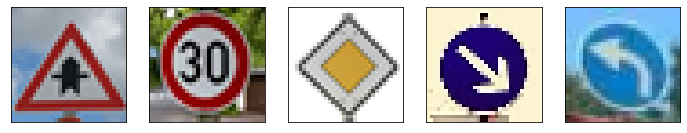

In [238]:
test_imgs = []
path = 'resources/downloadedimgs/'
for i in range(1,6):
    img_path = path+str(i)+'x.png'
    image = cv2.imread(img_path)
    test_imgs.append(image)
    
matplotlib_imgs = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in test_imgs]
show_images(matplotlib_imgs, divider= 5)    

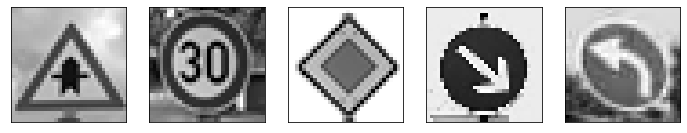

In [239]:
# Graysscale the test images 
test_imgs = np.asarray(test_imgs)
test_imgs_gray = np.sum(test_imgs / 3, axis=3, keepdims=True)
show_images(test_imgs_gray,gray=True,divider= 5)

In [240]:
# Normalize the test images
test_imgs_normalized = (test_imgs_gray - 128)/128
test_imgs_normalized = np.array(test_imgs_normalized, np.float32)

In [241]:
X_valid, y_valid = valid['features'], valid['labels']

In [242]:
import csv

signs_class=[]
with open('signnames.csv', 'rt') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        signs_class.append((row['SignName']))

### Predict the Sign Type for Each Image

In [250]:
top5_data =[]

def predict_and_visualize_new_images(img, mpimg):
    pred = conv_net(img)
    top5_data.append(tf.nn.top_k(pred, k=5))
    top_k = tf.nn.top_k(pred, k=3)
    top_k = np.uint8(top_k.indices[0])
   
    imgs = X_valid[y_valid==top_k[0] ]
    top1 = imgs[0,:,:,:]

    imgs = X_valid[y_valid==top_k[1] ]
    top2 = imgs[0,:,:,:]

    imgs = X_valid[y_valid==top_k[2] ]
    top3 = imgs[0,:,:,:]

    fig, axs = plt.subplots(1,4, figsize=(18, 18))
#     fig.subplots_adjust( wspace=5)
    axs[0].imshow(mpimg)
    axs[0].axis('off')
    axs[0].set_title('Input Image')

    axs[1].imshow(top1)
    axs[1].axis('off')
    axs[1].set_title('Guess1: '+ signs_class[top_k[0]] )

    axs[2].imshow(top2.squeeze())
    axs[2].axis('off')
    axs[2].set_title('Guess2: '+ signs_class[top_k[1]] )

    axs[3].imshow(top3.squeeze())
    axs[3].axis('off')
    axs[3].set_title('Guess3: '+ signs_class[top_k[2]])

    plt.show()
    print("Guess1 accuracy: %f" % accuracy(pred, top_k[0]))
    print("Guess2 accuracy: %f" % accuracy(pred, top_k[1]))
    print("Guess3 accuracy: %f" % accuracy(pred, top_k[2]))

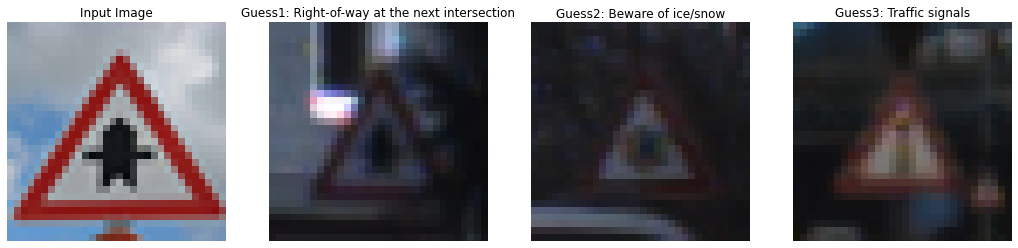

Guess1 accuracy: 1.000000
Guess2 accuracy: 0.000000
Guess3 accuracy: 0.000000


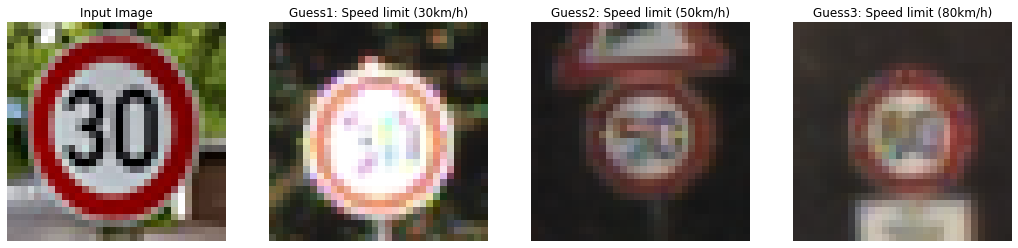

Guess1 accuracy: 1.000000
Guess2 accuracy: 0.000000
Guess3 accuracy: 0.000000


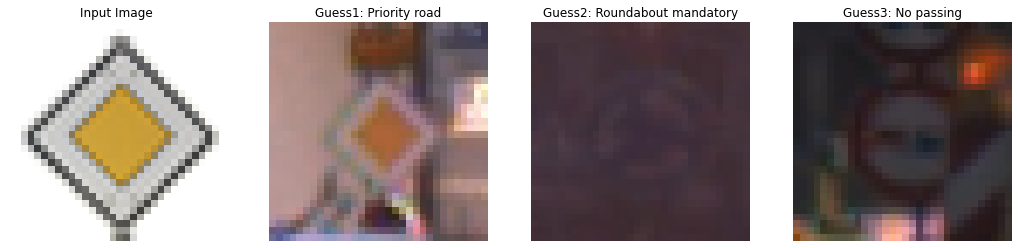

Guess1 accuracy: 1.000000
Guess2 accuracy: 0.000000
Guess3 accuracy: 0.000000


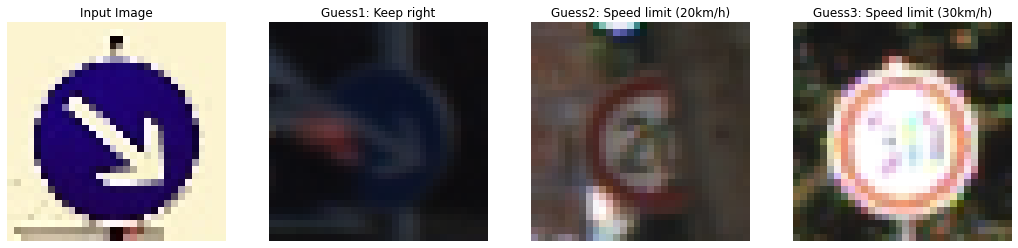

Guess1 accuracy: 1.000000
Guess2 accuracy: 0.000000
Guess3 accuracy: 0.000000


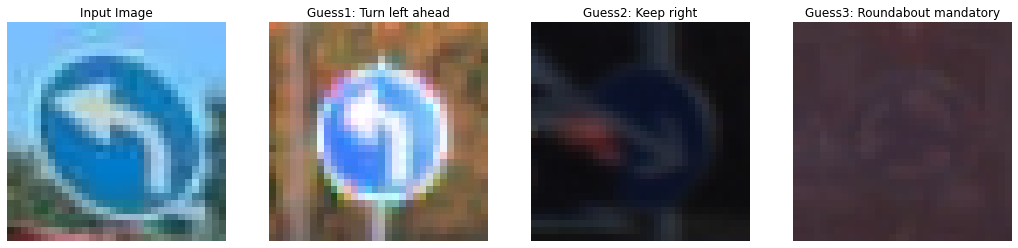

Guess1 accuracy: 1.000000
Guess2 accuracy: 0.000000
Guess3 accuracy: 0.000000


In [251]:
for img, mpimg in zip(test_imgs_normalized, matplotlib_imgs):
    predict_and_visualize_new_images(img, mpimg)

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

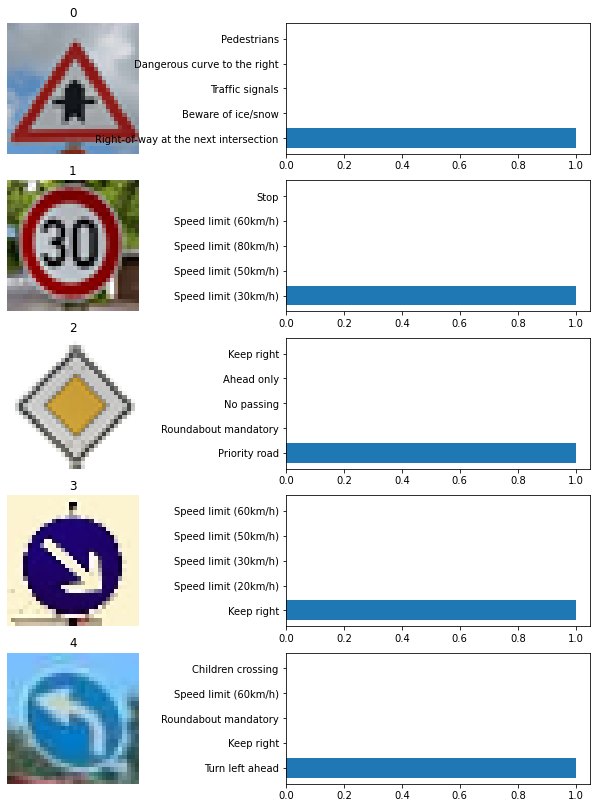

In [279]:
plt.figure(figsize=(12, 14))
for i in range(5):
    plt.subplot(5, 2, 2*i+1)
    plt.imshow(matplotlib_imgs[i]) 
    plt.title(i)
    plt.axis('off')
    plt.subplot(5, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), top5_data[i].values[0,:])
    labs=[signs_class[j] for j in top5_data[i].indices[0]]
    plt.yticks(np.arange(1, 6, 1), labs)

plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")